In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Lib')
sys.path.append('../Models')
import simulator_scipy
import simulator_myokit
import model_response
from br1977 import BR1977
from ord2011JK_v1 import ORD2011
import mod_kernik as kernik

import mod_trace as trace

import myokit

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:            
            best_individual = best_in_gen

    return best_individual

In [3]:
ga_result = 0
def plot_current_conributions(prestep=2000):
    trial_conditions = "ORD2011_288_51_4_-121_61"
    model_name = trial_conditions.split('_')[0]
    currents = ['I_Na', 'I_NaL', 'I_to', 'I_CaL', 'I_Kr', 'I_Ks', 'I_K1' ]                
    if model_name=='BR1977':
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']
    elif model_name=='Kernik':
        currents = ['I_Na', 'I_Kr', 'I_Ks', 'I_To', 'I_F', 'I_CaL', 'I_K1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
                
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        print(protocol)
                
        tr = None
        if model_name=='ORD2011' :
            model = ORD2011(protocol)
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='OHara2017':
            model = '../mmt-model-files/ohara-cipa-v1-2017_VC.mmt'
            tr = model_response.get_model_response_with_myokit(model, protocol, prestep=prestep)
        elif model_name=='BR1977' :
            model = BR1977(protocol)  
            tr = model_response.get_model_response_JK(model, protocol, prestep=prestep)
        elif model_name=='Kernik':
            k = kernik.KernikModel(is_exp_artefact=True)        
            tr = k.generate_response(protocol, is_no_ion_selective=False)
               
        tr.plot_currents_contribution(current,  window=10, step_size=5, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')
        
        print(tr.current_response_info.get_max_current_contributions(tr.t, window=10, step_size=5))
        print('-'*100)

|STEP: Voltage: -21.192033920500112, Duration: 752.649246303894| + |RAMP: Voltage Start: -14.675028340347374, Voltage End: -113.96608561075345, Duration: 107.30327594652503| + |RAMP: Voltage Start: -34.9671903327344, Voltage End: 41.237066608083424, Duration: 99.59121016877876| + |RAMP: Voltage Start: -31.78415487229718, Voltage End: -67.57348032772873, Duration: 903.9897535470996|


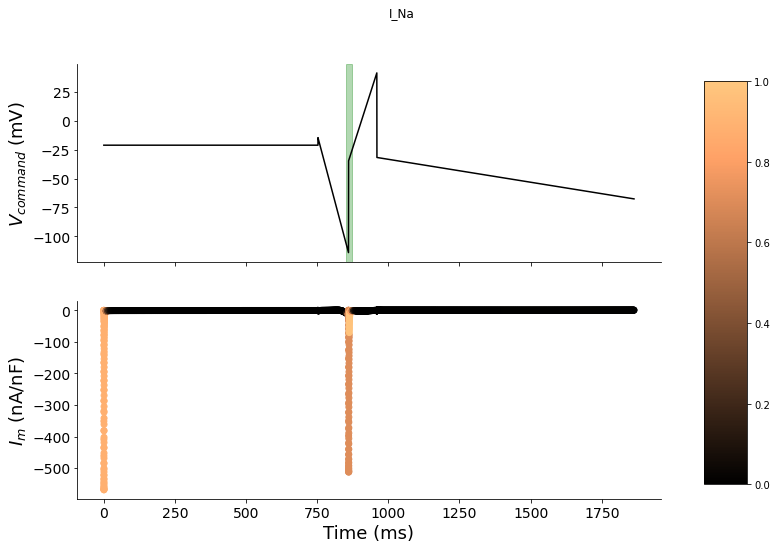

  Current  Contribution  Time Start  Time End
0    I_Na      0.976547       860.0     870.0
1   I_NaL      0.314585        35.0      45.0
2    I_to      0.238911       945.0     955.0
3   I_CaL      0.904118       900.0     910.0
4    I_Kr      0.859710       970.0     980.0
5    I_Ks      0.048895       765.0     775.0
6    I_K1      0.997685       845.0     855.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -120.6344015725005, Duration: 935.1762171406123| + |STEP: Voltage: -120.6344015725005, Duration: 935.1762171406123| + |STEP: Voltage: -120.87421944716017, Duration: 793.1991111789367| + |RAMP: Voltage Start: -2.7713276542567864, Voltage End: -74.84213289644316, Duration: 112.79607720327556|


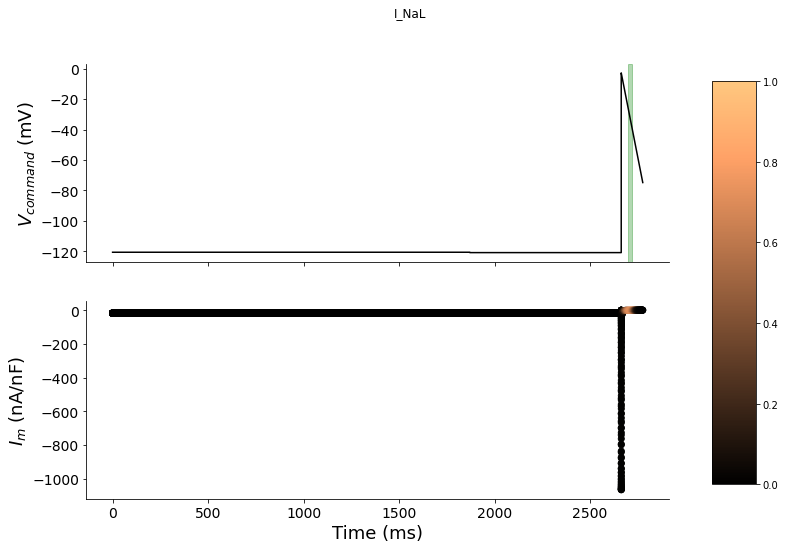

  Current  Contribution  Time Start  Time End
0    I_Na      0.685075      2660.0    2670.0
1   I_NaL      0.716248      2705.0    2715.0
2    I_to      0.105228      2685.0    2695.0
3   I_CaL      0.529323      2670.0    2680.0
4    I_Kr      0.016022      2725.0    2735.0
5    I_Ks      0.000541      2710.0    2720.0
6    I_K1      0.999982      1875.0    1885.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -65.54247754948985, Duration: 749.2852608248462| + |STEP: Voltage: 60.89878539050991, Duration: 193.77961433249078| + |RAMP: Voltage Start: -110.7050790238336, Voltage End: -88.39674459614254, Duration: 75.51621058382167| + |STEP: Voltage: 51.5220125532698, Duration: 219.64679605719883|


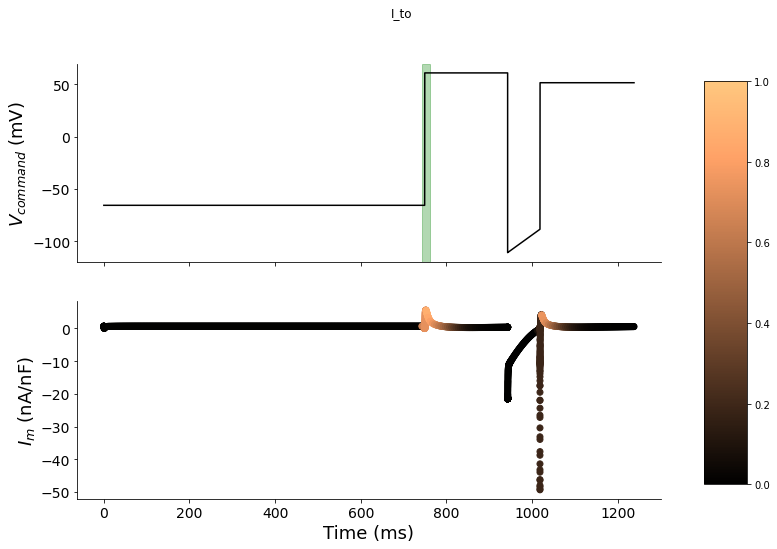

  Current  Contribution  Time Start  Time End
0    I_Na      0.522806      1010.0    1020.0
1   I_NaL      0.030944      1090.0    1100.0
2    I_to      0.877054       750.0     760.0
3   I_CaL      0.360541       935.0     945.0
4    I_Kr      0.509780       870.0     880.0
5    I_Ks      0.447302      1225.0    1235.0
6    I_K1      0.974581       735.0     745.0
----------------------------------------------------------------------------------------------------
|RAMP: Voltage Start: -20.69020412379536, Voltage End: -20.66290042953395, Duration: 771.465746575979| + |RAMP: Voltage Start: -22.683087039960455, Voltage End: -29.762700620908646, Duration: 959.092302865946| + |STEP: Voltage: -28.957941546931057, Duration: 963.3792209240725| + |STEP: Voltage: 0.6112568316497514, Duration: 633.9335738258753|


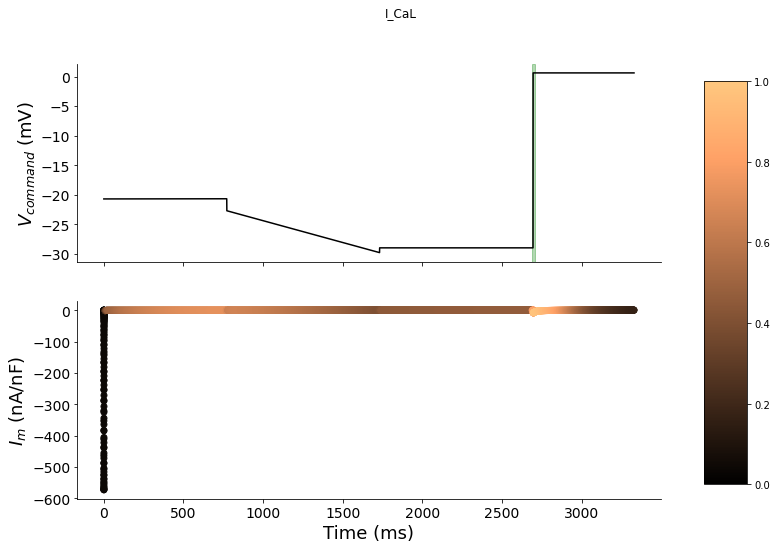

  Current  Contribution  Time Start  Time End
0    I_Na      0.877165         0.0      10.0
1   I_NaL      0.306010        35.0      45.0
2    I_to      0.139750        50.0      60.0
3   I_CaL      0.986778      2695.0    2705.0
4    I_Kr      0.518647      3315.0    3325.0
5    I_Ks      0.309027      3315.0    3325.0
6    I_K1      0.249406      1720.0    1730.0
----------------------------------------------------------------------------------------------------
|RAMP: Voltage Start: -66.36481497957497, Voltage End: -41.570044348103565, Duration: 972.5232749899922| + |RAMP: Voltage Start: -50.826050706267274, Voltage End: -51.37511358568, Duration: 975.13569257601| + |RAMP: Voltage Start: -55.95393323020335, Voltage End: -39.00427836784277, Duration: 791.0031061710046| + |RAMP: Voltage Start: 60.79504462374705, Voltage End: -111.35154599817501, Duration: 193.41155378392398|


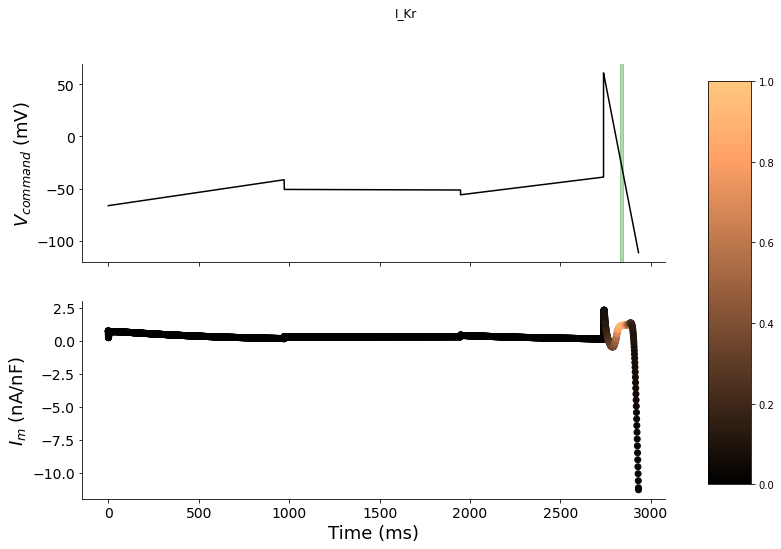

  Current  Contribution  Time Start  Time End
0    I_Na      0.191235         0.0      10.0
1   I_NaL      0.018453       960.0     970.0
2    I_to      0.732763      2735.0    2745.0
3   I_CaL      0.602668      2780.0    2790.0
4    I_Kr      0.916205      2835.0    2845.0
5    I_Ks      0.011997      2820.0    2830.0
6    I_K1      0.963832        90.0     100.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: 55.841025567486014, Duration: 778.0961575699066| + |STEP: Voltage: -110.78724662808052, Duration: 215.98659268860592| + |STEP: Voltage: 52.420827824481165, Duration: 803.4812400961757| + |STEP: Voltage: -87.90281464332278, Duration: 149.80341916182826|


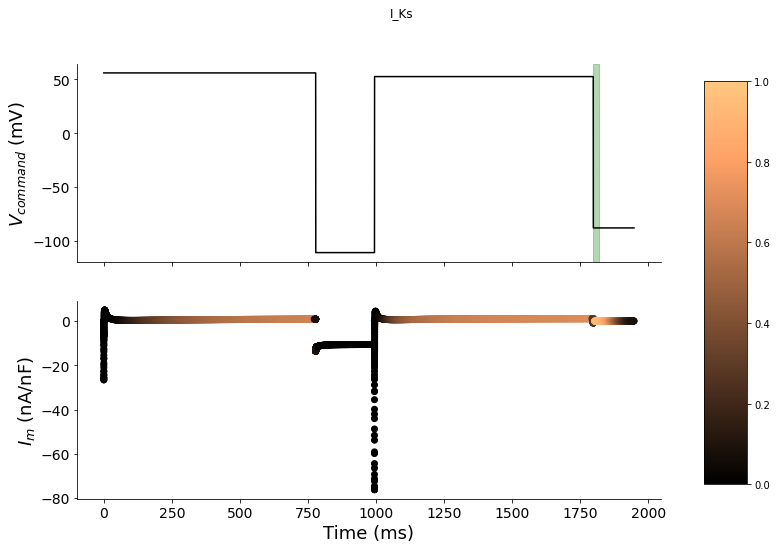

  Current  Contribution  Time Start  Time End
0    I_Na      0.840407      1935.0    1945.0
1   I_NaL      0.055753        85.0      95.0
2    I_to      0.794416         5.0      15.0
3   I_CaL      0.765921      1790.0    1800.0
4    I_Kr      0.512512       135.0     145.0
5    I_Ks      0.975284      1805.0    1815.0
6    I_K1      0.990415       980.0     990.0
----------------------------------------------------------------------------------------------------
|STEP: Voltage: -120.04876079755695, Duration: 859.0840221378263| + |STEP: Voltage: -117.9020919285784, Duration: 932.4293405869558| + |STEP: Voltage: -101.31965783015615, Duration: 505.44823047040956| + |STEP: Voltage: -120.99354601482024, Duration: 521.9485683864564|


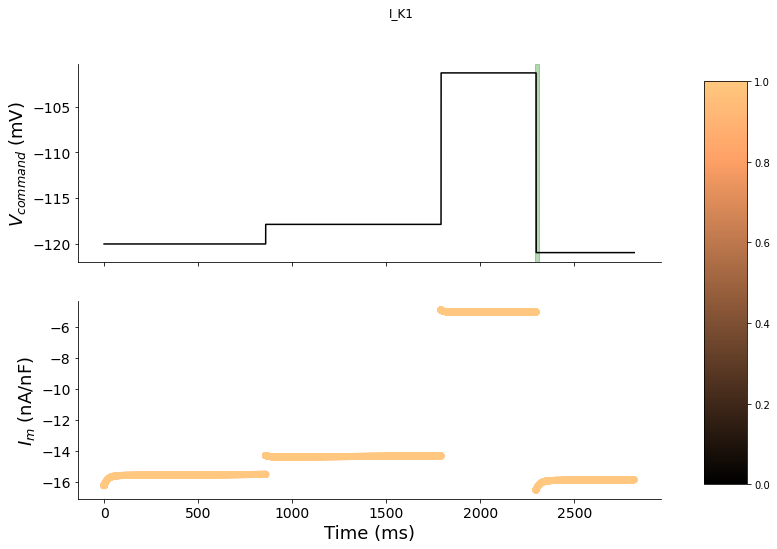

  Current  Contribution  Time Start  Time End
0    I_Na  1.801845e-05      1795.0    1805.0
1   I_NaL  2.400007e-06      1795.0    1805.0
2    I_to  1.251364e-04         0.0      10.0
3   I_CaL  1.689425e-08         0.0      10.0
4    I_Kr  7.157777e-07         0.0      10.0
5    I_Ks  4.452337e-10         0.0      10.0
6    I_K1  9.999826e-01      2300.0    2310.0
----------------------------------------------------------------------------------------------------
=====Complete==============================


In [4]:
if __name__ == '__main__':
    plot_current_conributions(prestep=2000)  
    print("=====Complete==============================")